# P-BMP280 and T-BMP280 measures 

In [1]:
import csv
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline

# Read Dataset

In [2]:
df = pd.read_csv('../data/raw/measures/P-BMP280-measures.csv')

In [3]:
df1 = pd.read_csv('../data/raw/measures/T-BMP280-measures.csv')

In [4]:
df.head()

,sensor,value,time
0,P-BMP280,1035.56,2017-12-22T10:52:59Z
1,P-BMP280,1035.55,2017-12-22T10:53:02Z
2,P-BMP280,1035.54,2017-12-22T10:53:05Z
3,P-BMP280,1035.54,2017-12-22T10:53:08Z
4,P-BMP280,1035.53,2017-12-22T10:53:11Z


In [5]:
df.tail()

,sensor,value,time
1422783,P-BMP280,1015.95,2018-03-13T11:41:52Z
1422784,P-BMP280,1015.94,2018-03-13T11:41:56Z
1422785,P-BMP280,1015.91,2018-03-13T11:42:00Z
1422786,P-BMP280,1015.93,2018-03-13T11:42:04Z
1422787,P-BMP280,1015.93,2018-03-13T11:42:08Z


In [6]:
df1.head()

,sensor,value,time
0,T-BMP280,26.43,2017-12-22T10:52:59Z
1,T-BMP280,26.43,2017-12-22T10:53:02Z
2,T-BMP280,26.44,2017-12-22T10:53:05Z
3,T-BMP280,26.44,2017-12-22T10:53:08Z
4,T-BMP280,26.42,2017-12-22T10:53:11Z


In [7]:
df1.tail()

,sensor,value,time
1422790,T-BMP280,27.34,2018-03-13T11:41:52Z
1422791,T-BMP280,27.34,2018-03-13T11:41:56Z
1422792,T-BMP280,27.33,2018-03-13T11:42:00Z
1422793,T-BMP280,27.33,2018-03-13T11:42:04Z
1422794,T-BMP280,27.34,2018-03-13T11:42:08Z


# Investigating the data

In [8]:
df.columns

Index(['sensor', 'value', 'time'], dtype='object')

In [9]:
df.count()

sensor    1422788
value     1422788
time      1422788
dtype: int64

In [10]:
df1.columns

Index(['sensor', 'value', 'time'], dtype='object')

In [11]:
df1.count()

sensor    1422795
value     1422795
time      1422795
dtype: int64

In [12]:
df.isnull().sum()

sensor    0
value     0
time      0
dtype: int64

In [13]:
df1.isnull().sum()

sensor    0
value     0
time      0
dtype: int64

In [14]:
df.dtypes

sensor     object
value     float64
time       object
dtype: object

In [15]:
df1.dtypes

sensor     object
value     float64
time       object
dtype: object

Convert time column into date time format

In [16]:
df['time'] = pd.to_datetime(df['time'])
df1['time'] = pd.to_datetime(df1['time'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422788 entries, 0 to 1422787
Data columns (total 3 columns):
sensor    1422788 non-null object
value     1422788 non-null float64
time      1422788 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 32.6+ MB


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422795 entries, 0 to 1422794
Data columns (total 3 columns):
sensor    1422795 non-null object
value     1422795 non-null float64
time      1422795 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 32.6+ MB


In [19]:
assert df.notna().all().all()
assert df1.notna().all().all() 

In [20]:
missingdf = pd.DataFrame(df.isna().sum()).rename(columns = {0: 'total'})
missingdf['percent'] = missingdf['total'] / len(df)
missingdf

,total,percent
sensor,0,0.0
value,0,0.0
time,0,0.0


No missing data and different format between data sensor P-BMP280 and T-BMP280 measures

P-BMP280 measures the pressure and T-BMP280 measures the temperature. Here I try to merge the data P-BMP280 and T-BMP280 measures, because the measurement time is almost the same

In [21]:
df.rename(columns={'sensor': 'pressure sensor','value' : 'P-BMP280'},inplace=True)
df1.rename(columns={'sensor': 'temperature sensor','value' : 'T-BMP280'},inplace=True)

In [22]:
df.head()

,pressure sensor,P-BMP280,time
0,P-BMP280,1035.56,2017-12-22 10:52:59
1,P-BMP280,1035.55,2017-12-22 10:53:02
2,P-BMP280,1035.54,2017-12-22 10:53:05
3,P-BMP280,1035.54,2017-12-22 10:53:08
4,P-BMP280,1035.53,2017-12-22 10:53:11


In [23]:
df1.head()

,temperature sensor,T-BMP280,time
0,T-BMP280,26.43,2017-12-22 10:52:59
1,T-BMP280,26.43,2017-12-22 10:53:02
2,T-BMP280,26.44,2017-12-22 10:53:05
3,T-BMP280,26.44,2017-12-22 10:53:08
4,T-BMP280,26.42,2017-12-22 10:53:11


In [24]:
newdf =  pd.merge(df, df1, on='time', how='outer')

In [25]:
newdf.head()

,pressure sensor,P-BMP280,time,temperature sensor,T-BMP280
0,P-BMP280,1035.56,2017-12-22 10:52:59,T-BMP280,26.43
1,P-BMP280,1035.55,2017-12-22 10:53:02,T-BMP280,26.43
2,P-BMP280,1035.54,2017-12-22 10:53:05,T-BMP280,26.44
3,P-BMP280,1035.54,2017-12-22 10:53:08,T-BMP280,26.44
4,P-BMP280,1035.53,2017-12-22 10:53:11,T-BMP280,26.42


In [26]:
newdf.tail()

,pressure sensor,P-BMP280,time,temperature sensor,T-BMP280
1504464,NaN,NaN,2018-03-13 11:40:06,T-BMP280,27.31
1504465,NaN,NaN,2018-03-13 11:40:27,T-BMP280,27.31
1504466,NaN,NaN,2018-03-13 11:40:48,T-BMP280,27.31
1504467,NaN,NaN,2018-03-13 11:41:09,T-BMP280,27.28
1504468,NaN,NaN,2018-03-13 11:41:30,T-BMP280,27.32


In [27]:
newdf = newdf.reindex(columns=['time','pressure sensor','P-BMP280','temperature sensor','T-BMP280'])
newdf = newdf[['time','pressure sensor','P-BMP280','temperature sensor','T-BMP280']]

In [28]:
data = newdf.drop(["pressure sensor", "temperature sensor"], axis=1)

In [29]:
data.head()

,time,P-BMP280,T-BMP280
0,2017-12-22 10:52:59,1035.56,26.43
1,2017-12-22 10:53:02,1035.55,26.43
2,2017-12-22 10:53:05,1035.54,26.44
3,2017-12-22 10:53:08,1035.54,26.44
4,2017-12-22 10:53:11,1035.53,26.42


In [30]:
data.tail()

,time,P-BMP280,T-BMP280
1504464,2018-03-13 11:40:06,NaN,27.31
1504465,2018-03-13 11:40:27,NaN,27.31
1504466,2018-03-13 11:40:48,NaN,27.31
1504467,2018-03-13 11:41:09,NaN,27.28
1504468,2018-03-13 11:41:30,NaN,27.32


In [31]:
data.count()

time        1504469
P-BMP280    1422788
T-BMP280    1422795
dtype: int64

In [32]:
missingdata = pd.DataFrame(data.isna().sum()).rename(columns = {0: 'total'})
missingdata['percent'] = missingdata['total'] / len(data)
missingdata

,total,percent
time,0,0.000000
P-BMP280,81681,0.054292
T-BMP280,81674,0.054288


After merging the data from P-BMP280 and T-BMP280 sensor there are many missing data founded. This is maybe because the difference measurement time, so here I will try to interpolate the missing data.

Fill the NaN value on humidity value with intepolate data using time

In [33]:
data.set_index('time',inplace=True)
new_df = data.interpolate(method="time") 

In [34]:
new_df.tail()

,P-BMP280,T-BMP280
time,,
2018-03-13 11:40:06,1015.934,27.31
2018-03-13 11:40:27,1015.958,27.31
2018-03-13 11:40:48,1015.930,27.31
2018-03-13 11:41:09,1015.892,27.28
2018-03-13 11:41:30,1015.936,27.32


In [40]:
missingnewdf1 = pd.DataFrame(new_df.isna().sum()).rename(columns = {0: 'total'})
missingnewdf1['percent'] = missingnewdf1['total'] / len(new_df)
missingnewdf1

,total,percent
P-BMP280,0,0.0
T-BMP280,0,0.0


In [41]:
new_df.count()

P-BMP280    1504469
T-BMP280    1504469
dtype: int64

After interpolate and fill the data, no more missing value and I assume the data is clean

# Visualization

Text(0.5,1,'Time vs Temperature')

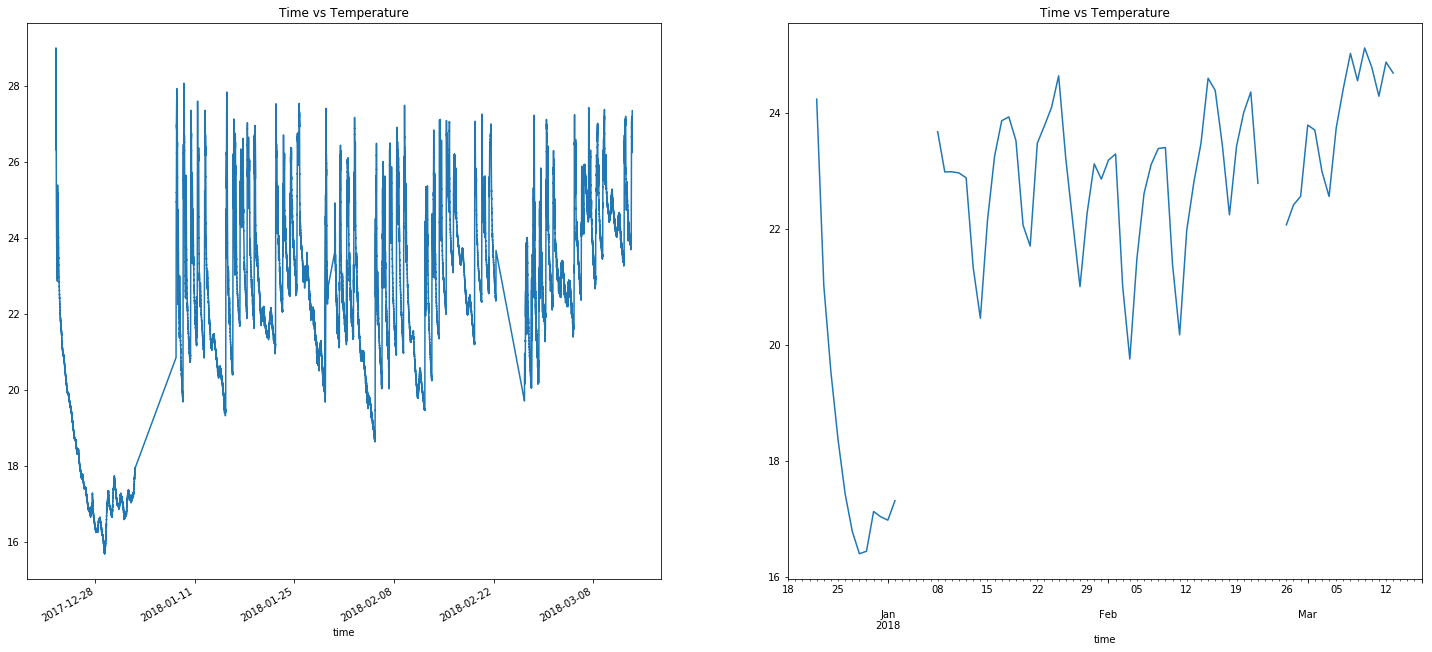

In [38]:
%matplotlib inline
plt.figure(figsize=(25, 25))
plt.subplot(2,2,1)
new_df1['T-BMP280'].plot()
plt.title('Time vs Temperature')

plt.subplot(2,2,2)
new_df1['T-BMP280'].resample('D').mean().plot()
plt.title('Time vs Temperature')

Text(0.5,1,'Time vs Pressure')

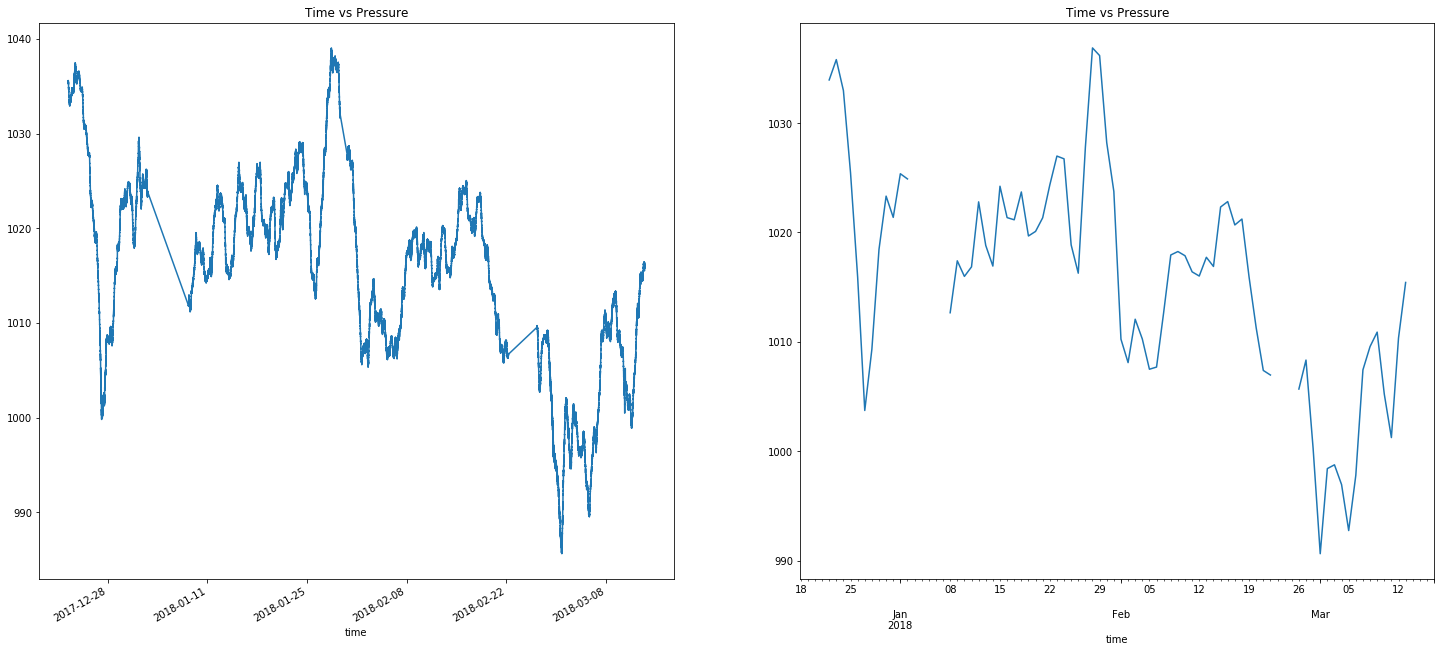

In [39]:
%matplotlib inline
plt.figure(figsize=(25, 25))
plt.subplot(2,2,1)
new_df1['P-BMP280'].plot()
plt.title('Time vs Pressure')

plt.subplot(2,2,2)
new_df1['P-BMP280'].resample('D').mean().plot()
plt.title('Time vs Pressure')

We can see that there are some days when there is no measurement at all 